###OPTIONAL : Install tensorflow if not already there

In [1]:
!pip uninstall tensorflow
!pip install tensorflow

Found existing installation: tensorflow 2.17.1
Uninstalling tensorflow-2.17.1:
  Would remove:
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.17.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? Y
Y

  Successfully uninstalled tensorflow-2.17.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 48.3 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of t

# Import necessary libraries

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix



# About the Project

We will be using a dataset of biological metrics of three different species of Penguins found in the Palmer Archipelago of Antartica.

The main question this work tries to explore is whether AI models can be useful for ecological studies and research on animals and wildlife, especially those found in remote regions of the planet. We want to explore whether AI can be used as a tool for further enhancing oru understanding of these species and using existing data to answer biological questions that are not easy to answer purely based on manual studies.

We plan to explore four different ML tasks in this project:

* **Species classification**
    * Objective: Build a model to classify penguin species (Adelie, Gentoo, Chinstrap) based on features like bill length, bill depth, flipper length, and body mass.
    * Applications: Wildlife monitoring, ecological studies, conservation efforts.

* **Sex classification**
    * Objective: Predict the sex of a penguin using the dataset's features.
    * Applications: Understanding population demographics, breeding patterns.

* **Bill Length Prediction**
  * Objective: Predict the bill length using other features.
  * Applications: To study the feeding habits of penguins and identify ways to preserve penguin communities by improving access to food.
* **Flipper length prediction**
  * Objective: Predict the flipper length based on other features.
  * Applications: Understanding the swimming capabilities of Penguins and their adaptations to changing ocean environments.


The first two are classification tasks and the last two are regression tasks. We plan to test several classication and regression models covered in the course and carry out a comprehensive comparative analysis of the different models. Through this small-scale study, we want to identify specific domains where machine learning has the potential to advance ecological research, and also identify potential pitfalls and drawbacks (if any) of using AI in this context.

# About the Dataset

Source: https://www.kaggle.com/datasets/samybaladram/palmers-penguin-dataset-extended

This dataset provides detailed measurements for three species of penguins (Adélie, Chinstrap, and Gentoo) observed in the Palmer Archipelago, Antarctica. This dataset provides a deeper insight into penguin biology and ecology, making it perfect for more sophisticated analysis. It is suitable for educational purposes, ecological studies, and advanced machine learning algorithms. It includes the following features:

* Species: Species of the penguin (Adelie, Chinstrap, Gentoo)
* Island: Island where the penguin was found (Biscoe, Dream, Torgensen)
* Sex: Gender of the penguin (Male, Female)
* Diet: Primary diet of the penguin (Fish, Krill, Squid)
* Year: Year the data was collected (2021-2025)
* Life Stage: The life stage of the penguin (Chick, Juvenile, Adult)
* Body Mass (g): Body mass in grams
* Bill Length (mm): Bill length in millimeters
* Bill Depth (mm): Bill depth in millimeters
* Flipper Length (mm): Flipper length in millimeters
* Health Metrics: Health status of the penguin (Healthy, Overweight, Underweight)




## Load the dataset using Pandas

In [4]:

# Load the dataset
data = pd.read_csv('palmerpenguins_extended.csv')

# Display the first few rows of the dataset
print(data.head())

  species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Biscoe            53.4           17.8              219.0   
1  Adelie  Biscoe            49.3           18.1              245.0   
2  Adelie  Biscoe            55.7           16.6              226.0   
3  Adelie  Biscoe            38.0           15.6              221.0   
4  Adelie  Biscoe            60.7           17.9              177.0   

   body_mass_g     sex  diet life_stage health_metrics  year  
0       5687.0  female  fish      adult     overweight  2021  
1       6811.0  female  fish      adult     overweight  2021  
2       5388.0  female  fish      adult     overweight  2021  
3       6262.0  female  fish      adult     overweight  2021  
4       4811.0  female  fish   juvenile     overweight  2021  


# Data pre-processing and cleanup

### Drop rows with missing values

In [5]:
data.dropna(inplace=True)

### Encode categorical variables

In [6]:
label_encoder = LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])
data['sex'] = label_encoder.fit_transform(data['sex'])

### Define features and target variables

In [7]:
X = data.drop(columns=['species', 'sex'])
y_species = data['species']
y_sex = data['sex']


### Identify categorical features

In [11]:
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

### Create a column transformer to handle encoding and scaling

In [12]:
preprocessor = ColumnTransformer(
    transformers
    =[
        ('num', StandardScaler(), X.select_dtypes(include=['float64', 'int64']).columns.tolist()),
        ('cat', OneHotEncoder(), categorical_features)
    ])

### Apply the transformations to the training and test sets

In [13]:

X_train, X_test, y_species_train, y_species_test = train_test_split(X, y_species, test_size=0.2, random_state=42)
X_train, X_test, y_sex_train, y_sex_test = train_test_split(X, y_sex, test_size=0.2, random_state=42)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# PART 1: Identifying Penguin Species and Sex using ML classification techniques

## Model training and evaluation

In [14]:
# Function to train and evaluate models
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, target_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Classification Report for {target_name}:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")

## Classification approach 1 : Logistic Regression

In [15]:
print("Logistic Regression:")
log_reg = LogisticRegression()
train_and_evaluate_model(log_reg, X_train, X_test, y_species_train, y_species_test, "Species")
train_and_evaluate_model(log_reg, X_train, X_test, y_sex_train, y_sex_test, "Sex")

Logistic Regression:
Classification Report for Species:
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       304
           1       0.70      0.70      0.70       125
           2       0.82      0.92      0.87       257

    accuracy                           0.79       686
   macro avg       0.77      0.78      0.77       686
weighted avg       0.79      0.79      0.78       686

Accuracy: 0.7871720116618076

Classification Report for Sex:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       364
           1       0.87      0.85      0.86       322

    accuracy                           0.87       686
   macro avg       0.87      0.87      0.87       686
weighted avg       0.87      0.87      0.87       686

Accuracy: 0.8731778425655977



## Classification approach 2 : Random Forest classifier

In [16]:
print("Random Forest:")
rf = RandomForestClassifier()
train_and_evaluate_model(rf, X_train, X_test, y_species_train, y_species_test, "Species")
train_and_evaluate_model(rf, X_train, X_test, y_sex_train, y_sex_test, "Sex")

Random Forest:
Classification Report for Species:
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       304
           1       0.71      0.70      0.71       125
           2       0.83      0.93      0.88       257

    accuracy                           0.80       686
   macro avg       0.78      0.79      0.78       686
weighted avg       0.80      0.80      0.79       686

Accuracy: 0.7973760932944607

Classification Report for Sex:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       364
           1       0.87      0.87      0.87       322

    accuracy                           0.87       686
   macro avg       0.87      0.87      0.87       686
weighted avg       0.87      0.87      0.87       686

Accuracy: 0.8746355685131195



## Classification approach 3 : Decision Tree

In [17]:
print("Decision Tree:")
dt = DecisionTreeClassifier()
train_and_evaluate_model(dt, X_train, X_test, y_species_train, y_species_test, "Species")
train_and_evaluate_model(dt, X_train, X_test, y_sex_train, y_sex_test, "Sex")

Decision Tree:
Classification Report for Species:
              precision    recall  f1-score   support

           0       0.68      0.67      0.68       304
           1       0.65      0.62      0.64       125
           2       0.78      0.81      0.80       257

    accuracy                           0.72       686
   macro avg       0.71      0.70      0.70       686
weighted avg       0.71      0.72      0.71       686

Accuracy: 0.7157434402332361

Classification Report for Sex:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       364
           1       0.85      0.85      0.85       322

    accuracy                           0.86       686
   macro avg       0.86      0.86      0.86       686
weighted avg       0.86      0.86      0.86       686

Accuracy: 0.8571428571428571



## Classification approach 4 : Support Vector Machine (SVM)



In [18]:
print("Support Vector Machine:")
svm = SVC()
train_and_evaluate_model(svm, X_train, X_test, y_species_train, y_species_test, "Species")
train_and_evaluate_model(svm, X_train, X_test, y_sex_train, y_sex_test, "Sex")

Support Vector Machine:
Classification Report for Species:
              precision    recall  f1-score   support

           0       0.82      0.69      0.75       304
           1       0.70      0.77      0.73       125
           2       0.82      0.93      0.87       257

    accuracy                           0.79       686
   macro avg       0.78      0.80      0.78       686
weighted avg       0.80      0.79      0.79       686

Accuracy: 0.7944606413994169

Classification Report for Sex:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       364
           1       0.90      0.88      0.89       322

    accuracy                           0.90       686
   macro avg       0.90      0.90      0.90       686
weighted avg       0.90      0.90      0.90       686

Accuracy: 0.8994169096209913



## Classification Approach 4 : Neural Network based classifier

In [19]:
print("Neural Network:")
nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # Assuming 3 classes for species
])
nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
nn.fit(X_train, y_species_train, epochs=10, batch_size=32, verbose=0)
y_species_pred = np.argmax(nn.predict(X_test), axis=1)
print("Classification Report for Species:")
print(classification_report(y_species_test, y_species_pred))
print(f"Accuracy: {accuracy_score(y_species_test, y_species_pred)}\n")

nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')  # Assuming 2 classes for sex
])
nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
nn.fit(X_train, y_sex_train, epochs=10, batch_size=32, verbose=0)
y_sex_pred = np.argmax(nn.predict(X_test), axis=1)
print("Classification Report for Sex:")
print(classification_report(y_sex_test, y_sex_pred))
print(f"Accuracy: {accuracy_score(y_sex_test, y_sex_pred)}\n")

Neural Network:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Classification Report for Species:
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       304
           1       0.70      0.70      0.70       125
           2       0.83      0.94      0.88       257

    accuracy                           0.80       686
   macro avg       0.78      0.78      0.78       686
weighted avg       0.80      0.80      0.79       686

Accuracy: 0.7973760932944607



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report for Sex:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       364
           1       0.88      0.91      0.89       322

    accuracy                           0.90       686
   macro avg       0.90      0.90      0.90       686
weighted avg       0.90      0.90      0.90       686

Accuracy: 0.8994169096209913



# PART 2: Incroporating cross-validation and hyperparameter tuning to our classification models

In this part, we follow the same approach as above. We use five different ML approaches to solve the tasks of classifying the Penguins' species and their sex. However, we now introduce cross-validation and hyperparamter tuning techniques studied during the class to make our algorithms more robust.

## Function to train and evaluate standard models

In [20]:
def train_and_evaluate_model(model, param_grid, X_train, X_test, y_train, y_test, target_name):
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    print(f"Best Parameters for {target_name}: {grid_search.best_params_}")
    print(f"Classification Report for {target_name}:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")
    return best_model


## Logistic Regression

In [21]:

# Logistic Regression with hyperparameter tuning
print("Logistic Regression:")
log_reg_param_grid = {'C': [0.1, 1, 10]}
log_reg_best_model_species = train_and_evaluate_model(LogisticRegression(), log_reg_param_grid, X_train, X_test, y_species_train, y_species_test, "Species")
log_reg_best_model_sex = train_and_evaluate_model(LogisticRegression(), log_reg_param_grid, X_train, X_test, y_sex_train, y_sex_test, "Sex")


Logistic Regression:
Best Parameters for Species: {'C': 0.1}
Classification Report for Species:
              precision    recall  f1-score   support

           0       0.79      0.72      0.76       304
           1       0.72      0.69      0.70       125
           2       0.82      0.93      0.87       257

    accuracy                           0.79       686
   macro avg       0.78      0.78      0.78       686
weighted avg       0.79      0.79      0.79       686

Accuracy: 0.793002915451895

Best Parameters for Sex: {'C': 10}
Classification Report for Sex:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       364
           1       0.87      0.85      0.86       322

    accuracy                           0.87       686
   macro avg       0.87      0.87      0.87       686
weighted avg       0.87      0.87      0.87       686

Accuracy: 0.8702623906705539



## Random forest

In [22]:

# Random Forest with hyperparameter tuning
print("Random Forest:")
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
rf_best_model_species = train_and_evaluate_model(RandomForestClassifier(), rf_param_grid, X_train, X_test, y_species_train, y_species_test, "Species")
rf_best_model_sex = train_and_evaluate_model(RandomForestClassifier(), rf_param_grid, X_train, X_test, y_sex_train, y_sex_test, "Sex")


Random Forest:
Best Parameters for Species: {'max_depth': None, 'n_estimators': 100}
Classification Report for Species:
              precision    recall  f1-score   support

           0       0.80      0.72      0.75       304
           1       0.73      0.69      0.71       125
           2       0.82      0.93      0.87       257

    accuracy                           0.79       686
   macro avg       0.78      0.78      0.78       686
weighted avg       0.79      0.79      0.79       686

Accuracy: 0.793002915451895

Best Parameters for Sex: {'max_depth': 20, 'n_estimators': 100}
Classification Report for Sex:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       364
           1       0.88      0.86      0.87       322

    accuracy                           0.88       686
   macro avg       0.88      0.88      0.88       686
weighted avg       0.88      0.88      0.88       686

Accuracy: 0.8819241982507289



## Decision Tree

In [24]:

# Decision Tree with hyperparameter tuning
print("Decision Tree:")
dt_param_grid = {'max_depth': [None, 10, 20]}
dt_best_model_species = train_and_evaluate_model(DecisionTreeClassifier(), dt_param_grid, X_train, X_test, y_species_train, y_species_test, "Species")
dt_best_model_sex = train_and_evaluate_model(DecisionTreeClassifier(), dt_param_grid, X_train, X_test, y_sex_train, y_sex_test, "Sex")


Decision Tree:
Best Parameters for Species: {'max_depth': 10}
Classification Report for Species:
              precision    recall  f1-score   support

           0       0.70      0.64      0.67       304
           1       0.62      0.67      0.65       125
           2       0.79      0.83      0.81       257

    accuracy                           0.72       686
   macro avg       0.70      0.72      0.71       686
weighted avg       0.72      0.72      0.72       686

Accuracy: 0.7201166180758017

Best Parameters for Sex: {'max_depth': None}
Classification Report for Sex:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       364
           1       0.85      0.84      0.84       322

    accuracy                           0.85       686
   macro avg       0.85      0.85      0.85       686
weighted avg       0.85      0.85      0.85       686

Accuracy: 0.8542274052478134



## Support Vector Machine

In [23]:

# Support Vector Machine with hyperparameter tuning
print("Support Vector Machine:")
svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_best_model_species = train_and_evaluate_model(SVC(), svm_param_grid, X_train, X_test, y_species_train, y_species_test, "Species")
svm_best_model_sex = train_and_evaluate_model(SVC(), svm_param_grid, X_train, X_test, y_sex_train, y_sex_test, "Sex")


Support Vector Machine:
Best Parameters for Species: {'C': 0.1, 'kernel': 'linear'}
Classification Report for Species:
              precision    recall  f1-score   support

           0       0.83      0.67      0.74       304
           1       0.69      0.76      0.72       125
           2       0.81      0.95      0.87       257

    accuracy                           0.79       686
   macro avg       0.77      0.79      0.78       686
weighted avg       0.80      0.79      0.79       686

Accuracy: 0.7915451895043731

Best Parameters for Sex: {'C': 10, 'kernel': 'rbf'}
Classification Report for Sex:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       364
           1       0.91      0.89      0.90       322

    accuracy                           0.90       686
   macro avg       0.90      0.90      0.90       686
weighted avg       0.90      0.90      0.90       686

Accuracy: 0.9037900874635568



## Neural network with cross validation

In [27]:
def build_nn(output_units):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(output_units, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

print("Neural Network:")
nn_species = build_nn(3)  # Assuming 3 classes for species
nn_species.fit(X_train, y_species_train, epochs=10, batch_size=32)
y_species_pred = np.argmax(nn_species.predict(X_test), axis=1)
print("Classification Report for Species:")
print(classification_report(y_species_test, y_species_pred))
print(f"Accuracy: {accuracy_score(y_species_test, y_species_pred)}\n")

nn_sex = build_nn(2)  # Assuming 2 classes for sex
nn_sex.fit(X_train, y_sex_train, epochs=10, batch_size=32)
y_sex_pred = np.argmax(nn_sex.predict(X_test), axis=1)
print("Classification Report for Sex:")
print(classification_report(y_sex_test, y_sex_pred))
print(f"Accuracy: {accuracy_score(y_sex_test, y_sex_pred)}\n")

Neural Network:
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5279 - loss: 0.9264
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7233 - loss: 0.5860
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7671 - loss: 0.4516
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7802 - loss: 0.4264
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7893 - loss: 0.4184
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7756 - loss: 0.4212
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7775 - loss: 0.4174
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7843 - loss: 0.4073
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8204 - loss: 0.3811
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7920 - loss: 0.3931
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report for Species:
              precision    recall  f1-score   support

           0       0.81      0.67      0.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6056 - loss: 0.6403
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8541 - loss: 0.4072
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8793 - loss: 0.2980
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9103 - loss: 0.2315
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9114 - loss: 0.2170
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9189 - loss: 0.2106
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9254 - loss: 0.1901
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9202 - loss: 0.1788
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9302 - loss: 0.1751
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9326 - loss: 0.1777
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report for Sex:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91  

## Trying out an enhanced neural network with additional layers and regularization

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Enhanced Neural Network with additional layers and regularization
def build_enhanced_nn(output_units):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(output_units, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

print("Enhanced Neural Network:")
nn_species = build_enhanced_nn(3)  # Assuming 3 classes for species
nn_species.fit(X_train, y_species_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
y_species_pred = np.argmax(nn_species.predict(X_test), axis=1)
print("Classification Report for Species:")
print(classification_report(y_species_test, y_species_pred))
print(f"Accuracy: {accuracy_score(y_species_test, y_species_pred)}\n")

nn_sex = build_enhanced_nn(2)  # Assuming 2 classes for sex
nn_sex.fit(X_train, y_sex_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
y_sex_pred = np.argmax(nn_sex.predict(X_test), axis=1)
print("Classification Report for Sex:")
print(classification_report(y_sex_test, y_sex_pred))
print(f"Accuracy: {accuracy_score(y_sex_test, y_sex_pred)}\n")

Enhanced Neural Network:
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.4668 - loss: 1.3559 - val_accuracy: 0.6703 - val_loss: 0.8804
Epoch 2/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6757 - loss: 0.7985 - val_accuracy: 0.7122 - val_loss: 0.7248
Epoch 3/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7091 - loss: 0.6976 - val_accuracy: 0.7104 - val_loss: 0.6219
Epoch 4/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7019 - loss: 0.6735 - val_accuracy: 0.7268 - val_loss: 0.5412
Epoch 5/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7409 - loss: 0.5712 - val_accuracy: 0.7268 - val_loss: 0.5047
Epoch 6/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7379 - loss: 0.5576 - val_accuracy: 0.7486 - val_loss: 0.4716
Epoch 7/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7395 - loss: 0.5398 - val_accuracy: 0.7541 - val_loss: 0.4565
Epoch 8/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7609 - loss: 0.5144 - val_accuracy: 0.7505 - val_loss: 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5411 - loss: 1.0268 - val_accuracy: 0.6831 - val_loss: 0.6297
Epoch 2/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6611 - loss: 0.6923 - val_accuracy: 0.7268 - val_loss: 0.5552
Epoch 3/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7374 - loss: 0.5381 - val_accuracy: 0.7978 - val_loss: 0.4690
Epoch 4/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7884 - loss: 0.4472 - val_accuracy: 0.8634 - val_loss: 0.3729
Epoch 5/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8084 - loss: 0.4383 - val_accuracy: 0.9035 - val_loss: 0.2959
Epoch 6/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8563 - loss: 0.3486 - val_accuracy: 0.9126 - val_loss: 0.2495
Epoch 7/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8373 - loss: 0.3782 - val_accuracy: 0.9253 - val_loss: 0.2231
Epoch 8/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8534 - loss: 0.3148 - val_accuracy: 0.9107 - val_loss: 0.2

# Visualization of classification performance

## Plot confusion matrices for the best models

In [42]:
# Confusion Matrix Visualization Function
def plot_confusion_matrix_species(y_true, y_pred, title):

    species_names = ["Adelie", "Chinstrap", "Gentoo"]

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=species_names, yticklabels=species_names)
    plt.title(title)
    plt.xlabel('Predicted', fontsize = 16)
    plt.ylabel('Actual', fontsize = 16)
    plt.show()

# Confusion Matrix Visualization Function
def plot_confusion_matrix_sex(y_true, y_pred, title):

    sex_names = ["Female", "Male"]

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=sex_names, yticklabels=sex_names)
    plt.title(title)
    plt.xlabel('Predicted', fontsize = 16)
    plt.ylabel('Actual', fontsize = 16)
    plt.show()

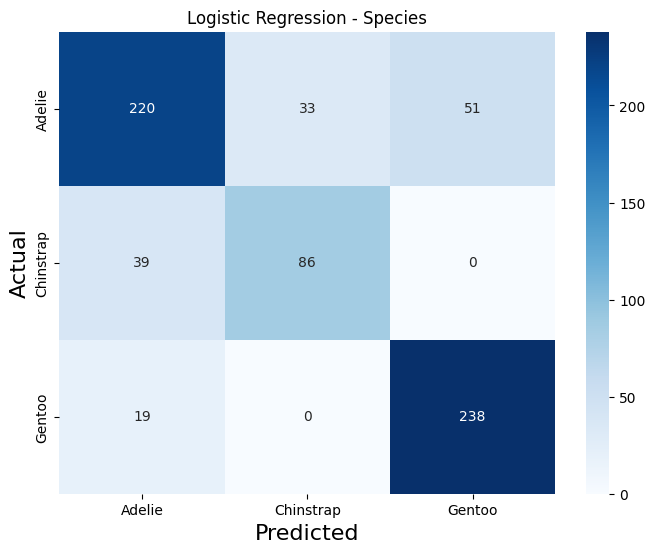

In [43]:
# Logistic Regression Confusion Matrices
plot_confusion_matrix_species(y_species_test, log_reg_best_model_species.predict(X_test), "Logistic Regression - Species")

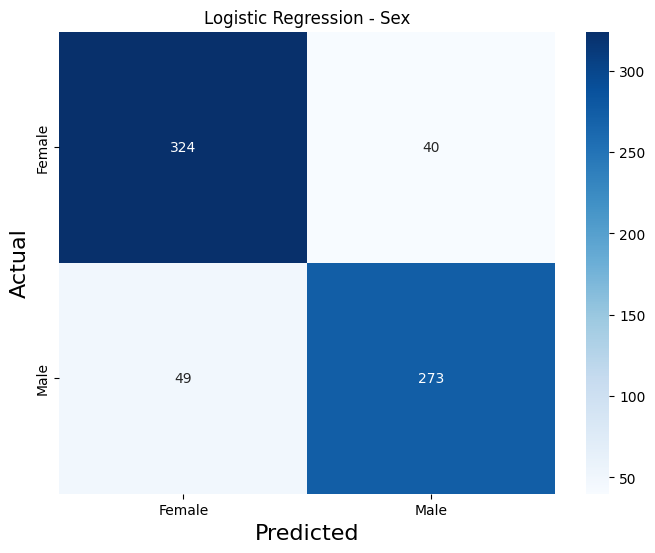

In [44]:
plot_confusion_matrix_sex(y_sex_test, log_reg_best_model_sex.predict(X_test), "Logistic Regression - Sex")

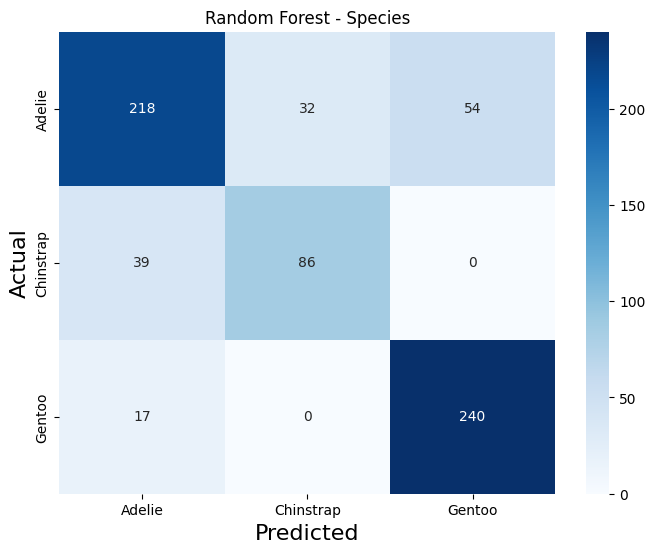

In [45]:


# Random Forest Confusion Matrices
plot_confusion_matrix_species(y_species_test, rf_best_model_species.predict(X_test), "Random Forest - Species")

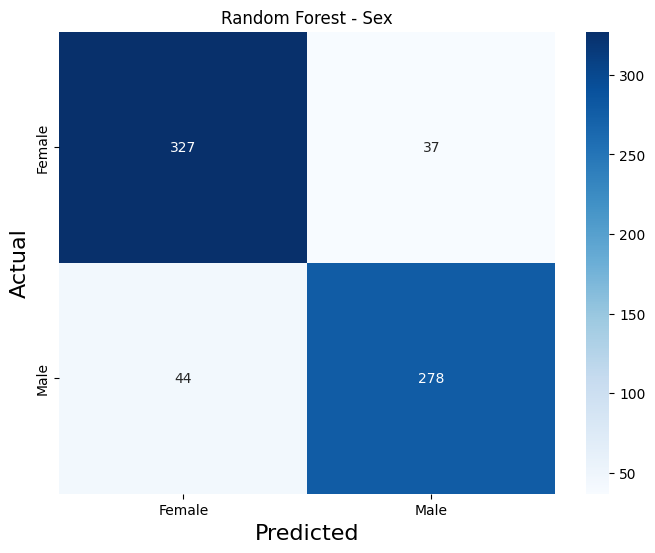

In [46]:

plot_confusion_matrix_sex(y_sex_test, rf_best_model_sex.predict(X_test), "Random Forest - Sex")

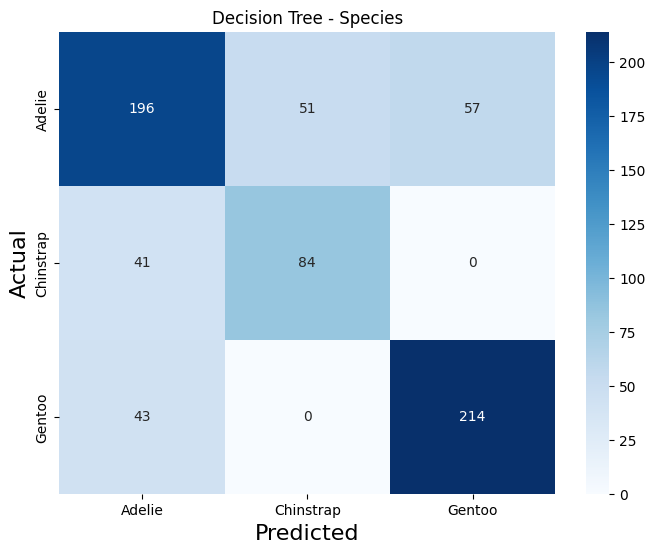

In [47]:


# Decision Tree Confusion Matrices
plot_confusion_matrix_species(y_species_test, dt_best_model_species.predict(X_test), "Decision Tree - Species")

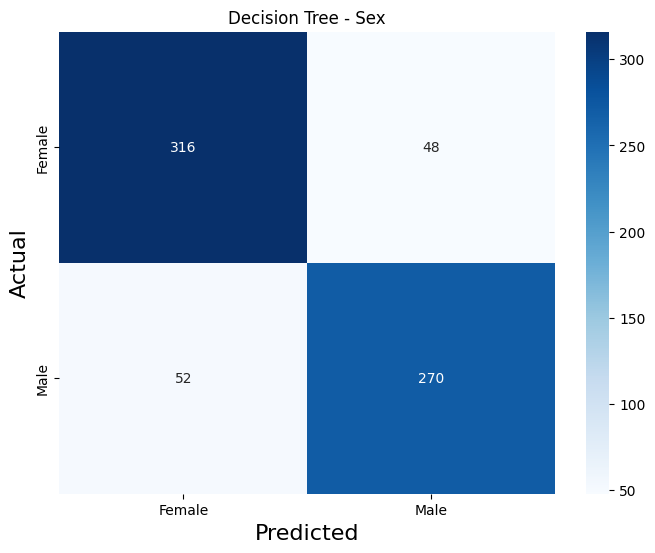

In [48]:

plot_confusion_matrix_sex(y_sex_test, dt_best_model_sex.predict(X_test), "Decision Tree - Sex")

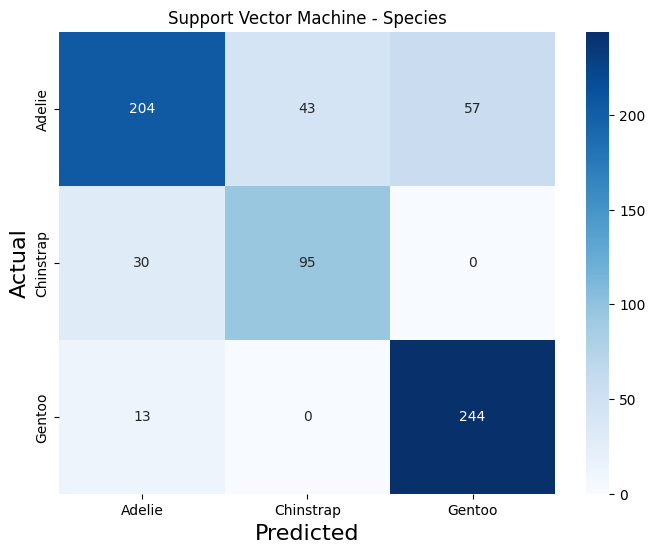

In [49]:


# Support Vector Machine Confusion Matrices
plot_confusion_matrix_species(y_species_test, svm_best_model_species.predict(X_test), "Support Vector Machine - Species")

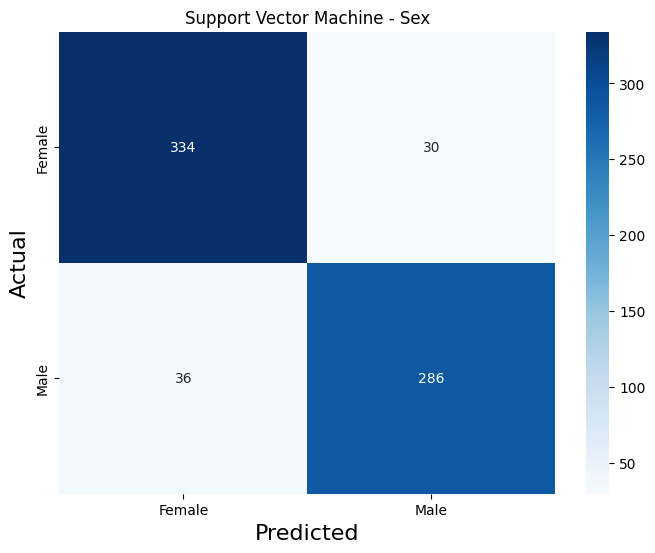

In [50]:

plot_confusion_matrix_sex(y_sex_test, svm_best_model_sex.predict(X_test), "Support Vector Machine - Sex")

# Visualizing the dataset for more insights

##Distribution of each feature by species

['Adelie', 'Chinstrap', 'Gentoo']


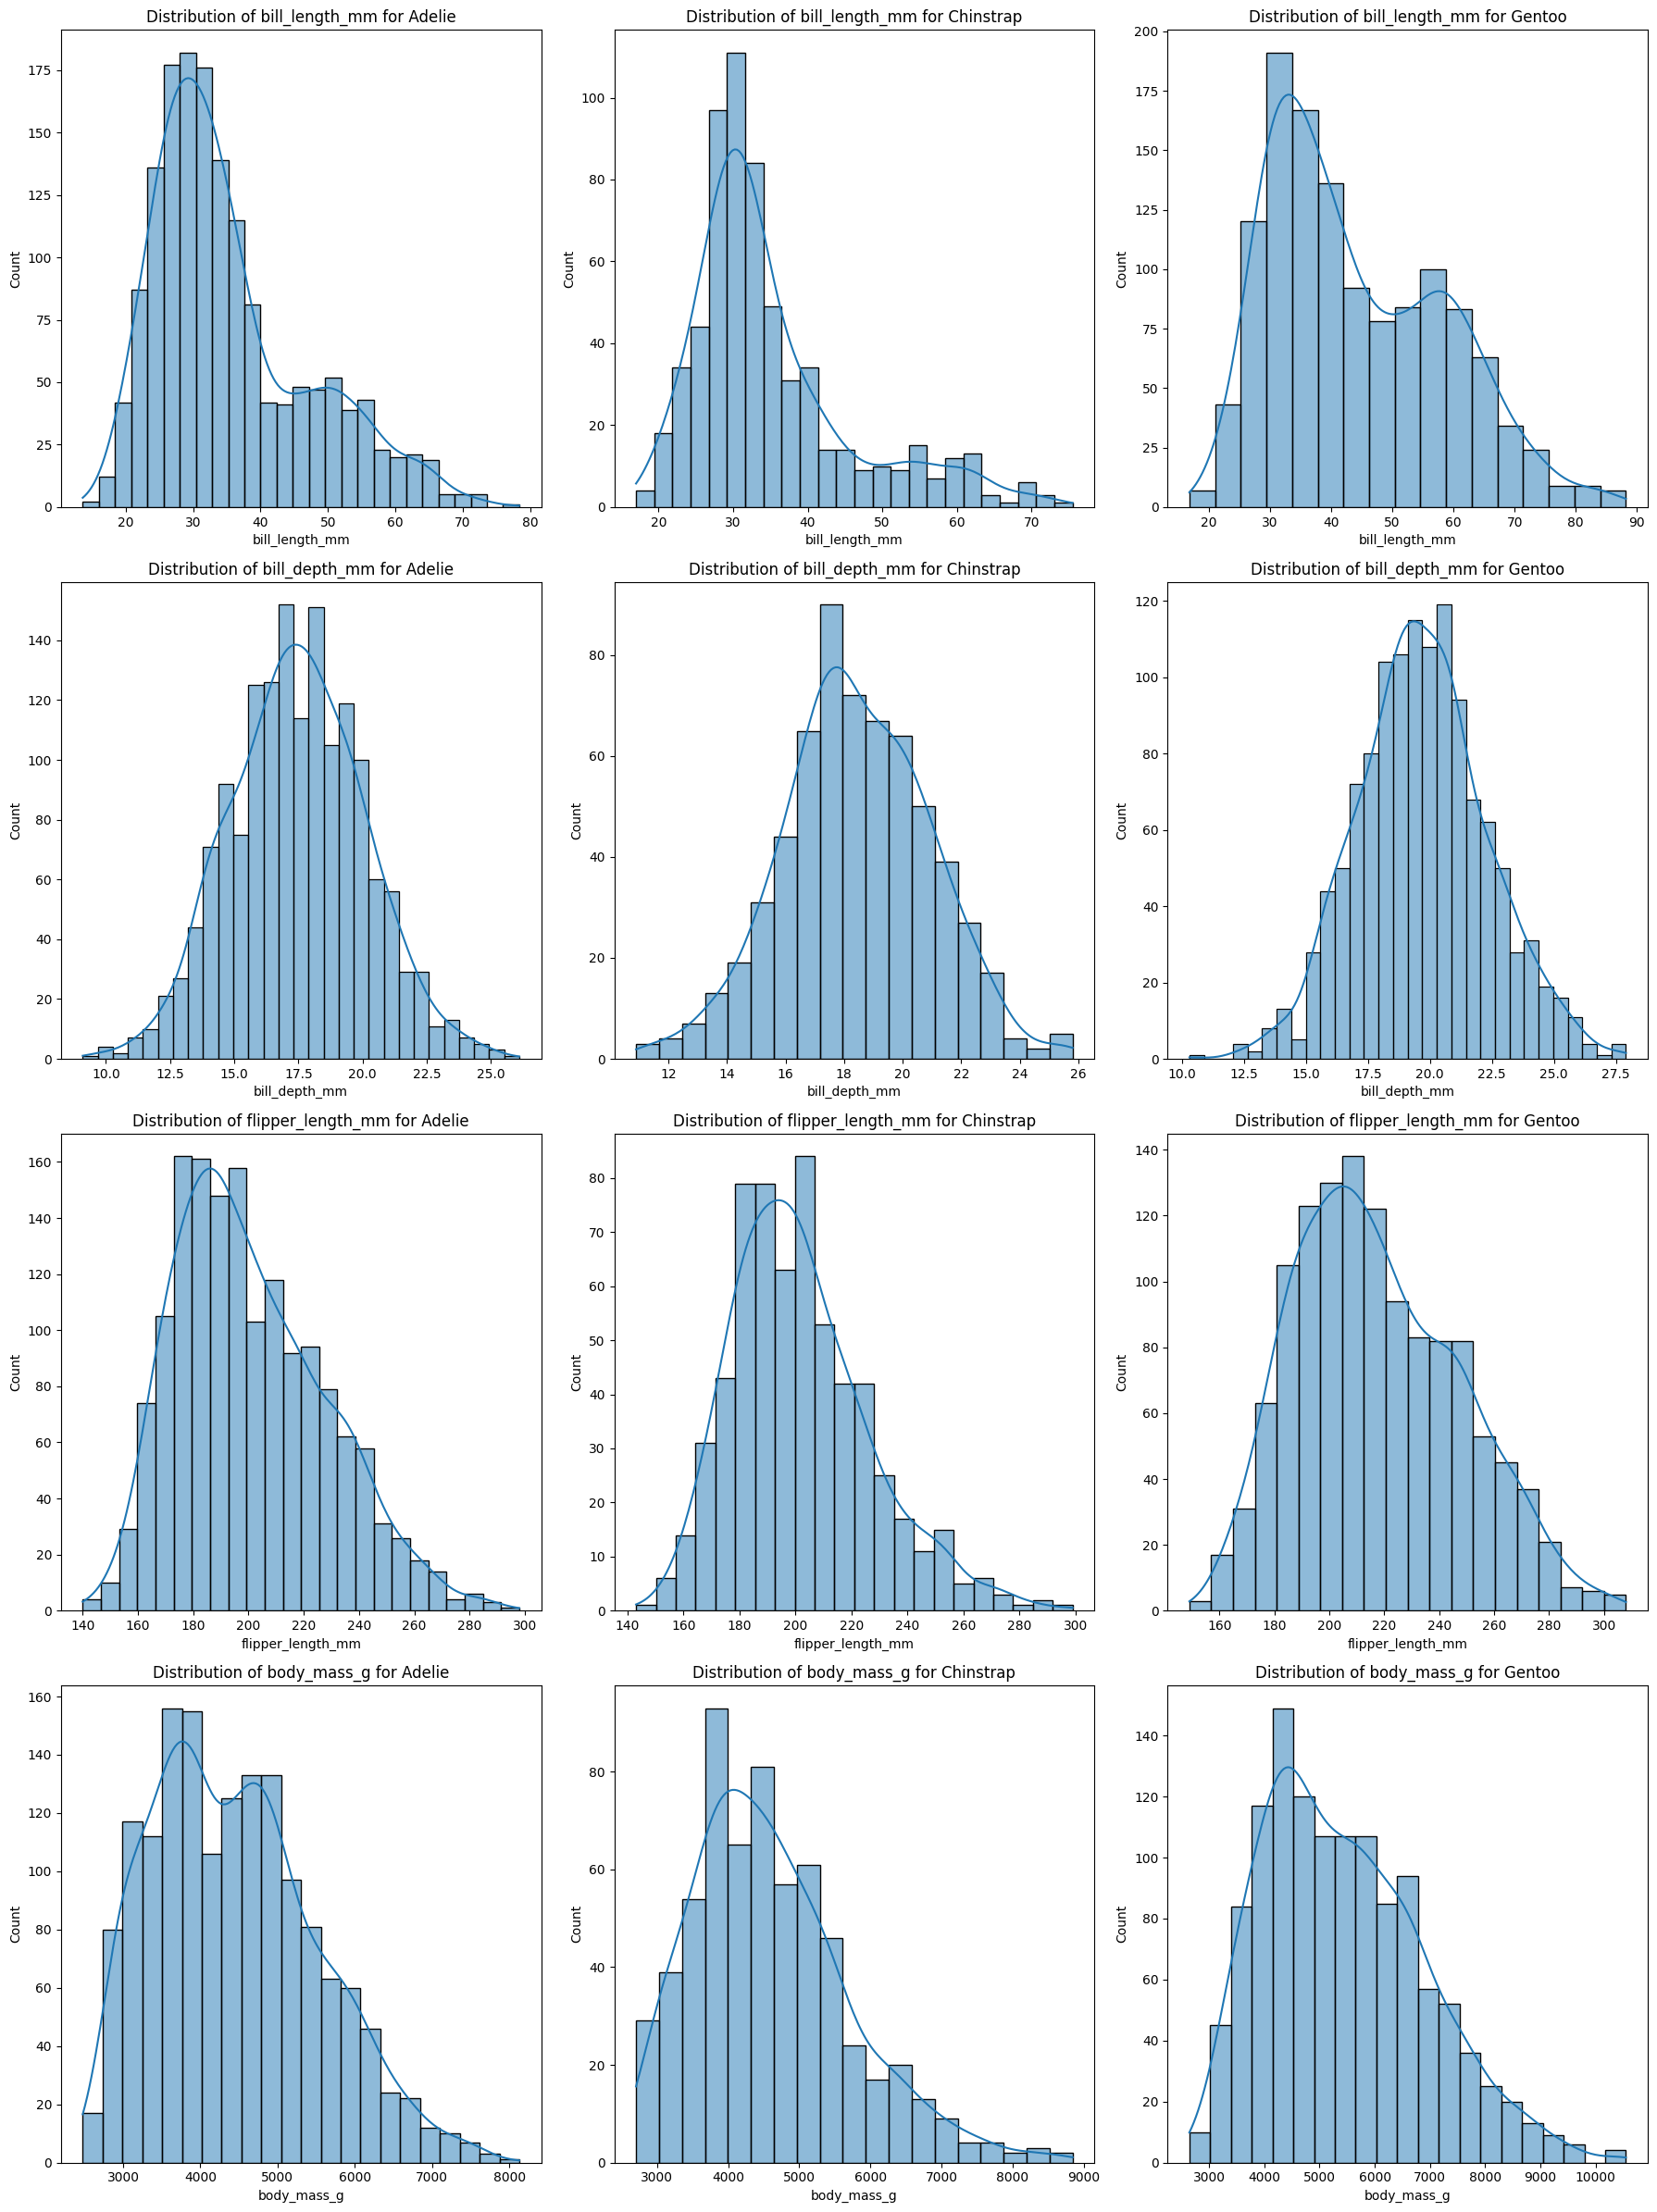

In [55]:
# Define features
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
species_list = ['Adelie', 'Chinstrap', 'Gentoo']

print(species_list)

# Plot distribution plots for each feature by species
fig, axes = plt.subplots(len(features), 3, figsize=(18, 24))
# species_list = data['species'].unique()

# print(species_list)
for i, feature in enumerate(features):
    for j, species in enumerate(species_list):
        sns.histplot(data[data['species'] == j], x=feature, kde=True, ax=axes[i, j])
        axes[i, j].set_title(f'Distribution of {feature} for {species}')
plt.tight_layout()
plt.show()

## Distribution of each feature by Sex

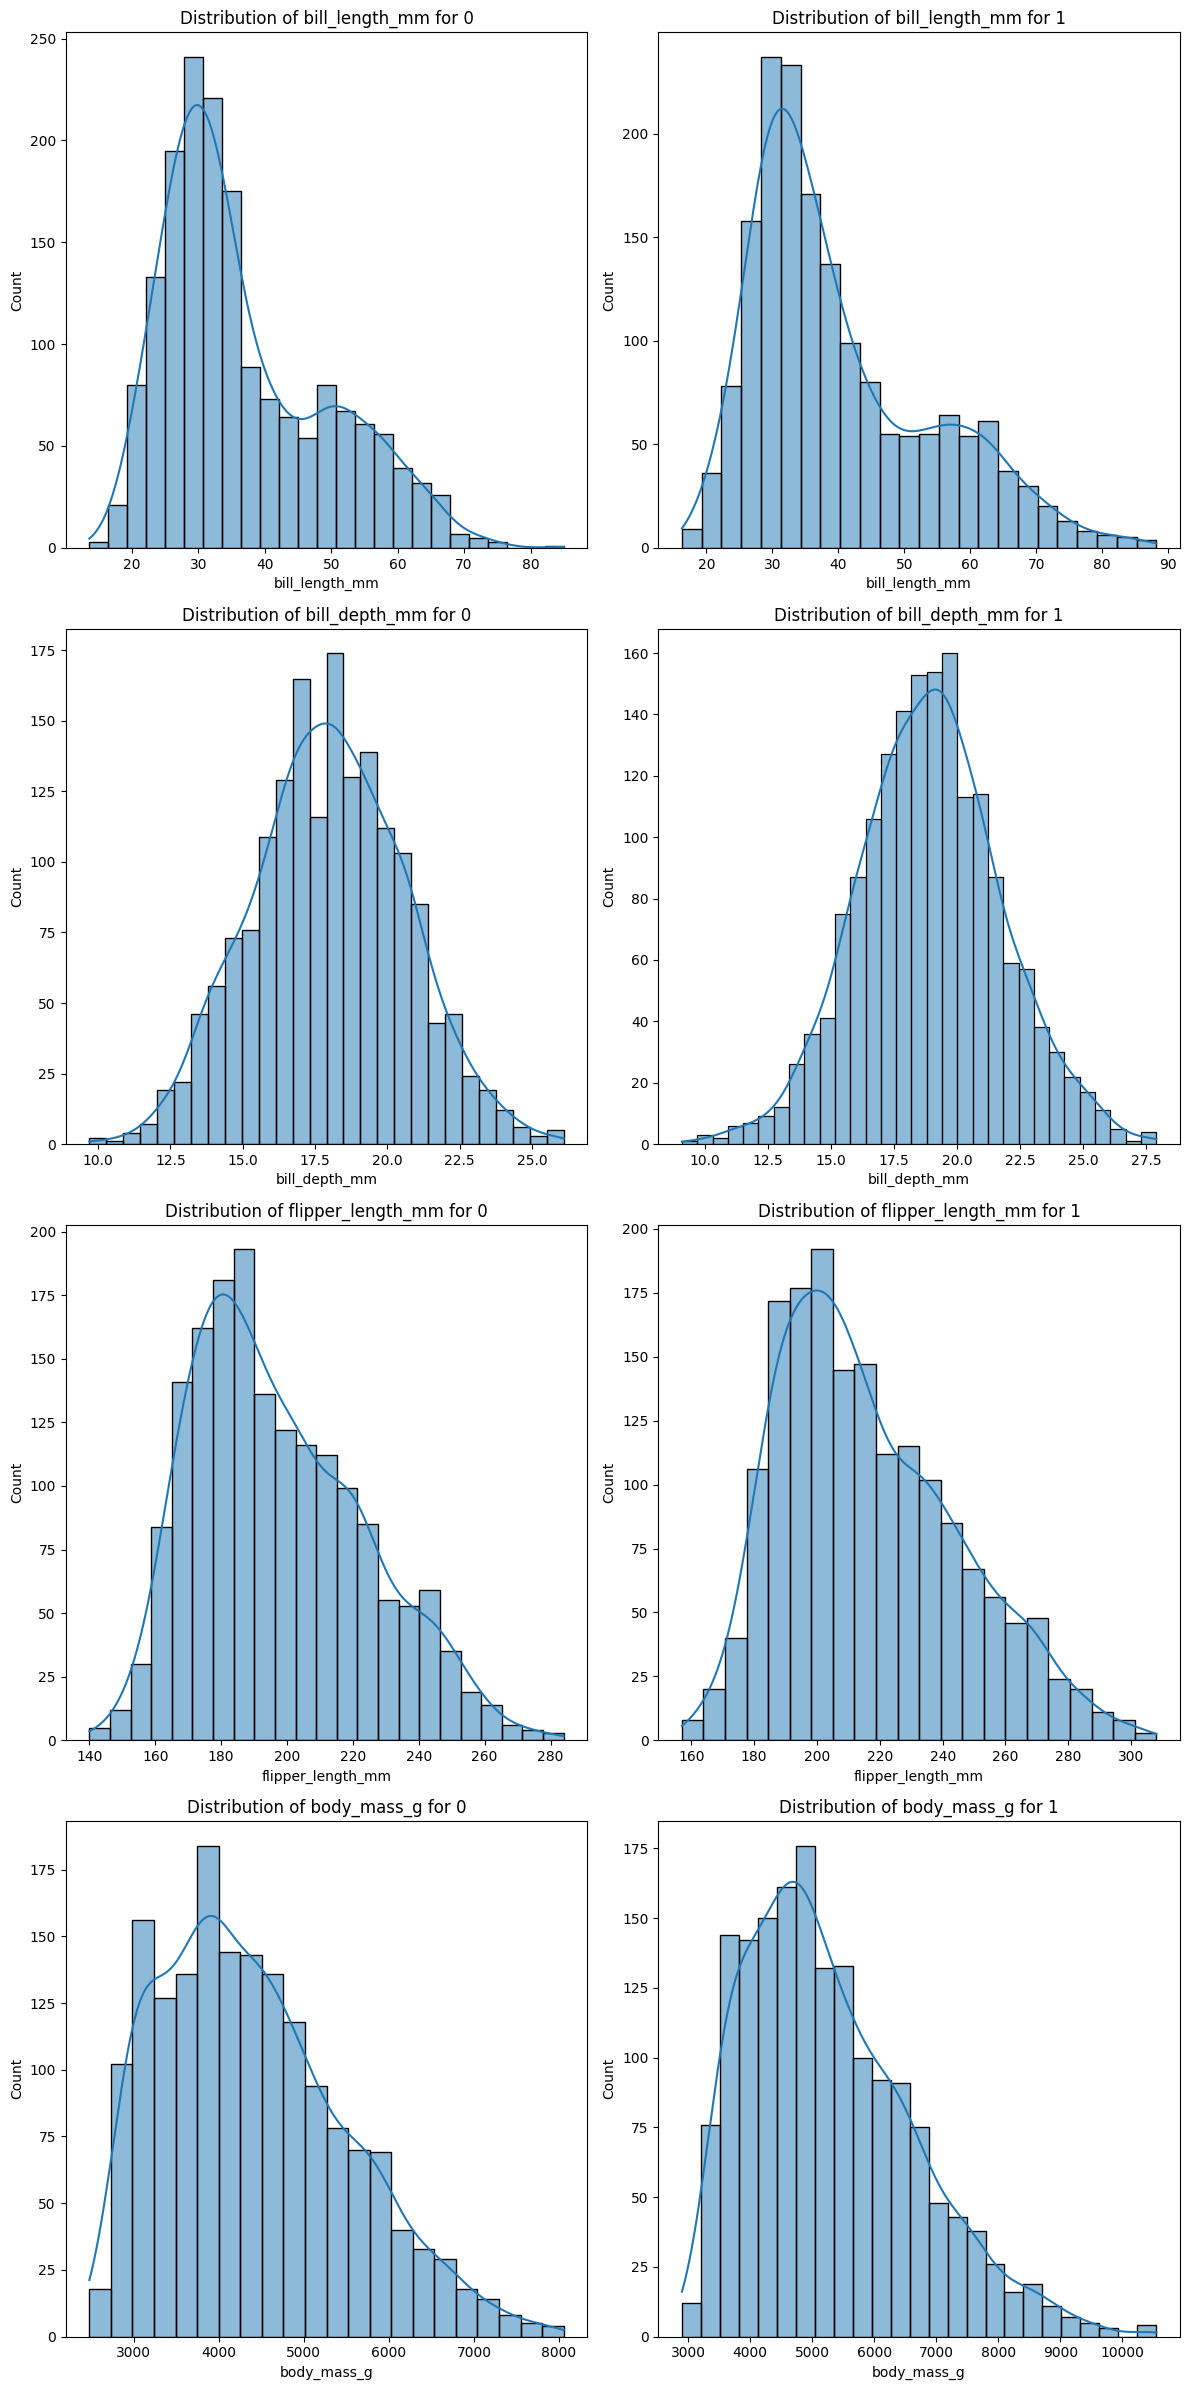

In [ ]:
fig, axes = plt.subplots(len(features), 2, figsize=(12, 24))
sex_list = data['sex'].unique()
for i, feature in enumerate(features):
    for j, sex in enumerate(sex_list):
        sns.histplot(data[data['sex'] == sex], x=feature, kde=True, ax=axes[i, j])
        axes[i, j].set_title(f'Distribution of {feature} for {sex}')
plt.tight_layout()
plt.show()

## Visualizations of species and sex with other categorical features

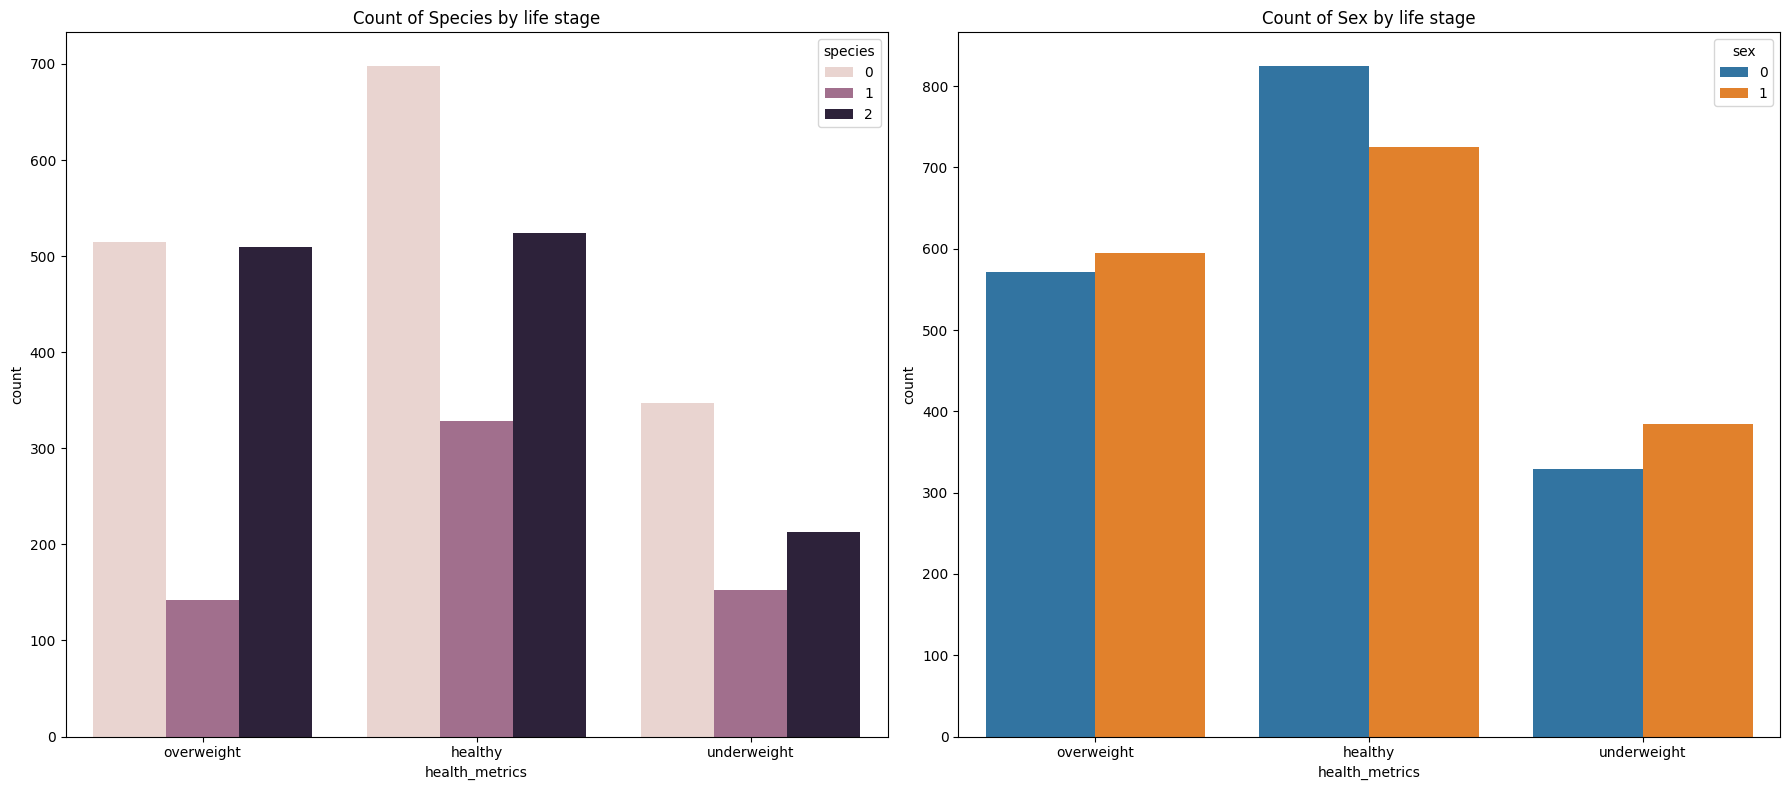

In [ ]:
# Plot count plots for species and sex with island
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.countplot(data=data, x='health_metrics', hue='species', ax=axes[0])
axes[0].set_title('Count of Species by life stage')
sns.countplot(data=data, x='health_metrics', hue='sex', ax=axes[1])
axes[1].set_title('Count of Sex by life stage')
plt.tight_layout()
plt.show()

## Feature correlation heatmap

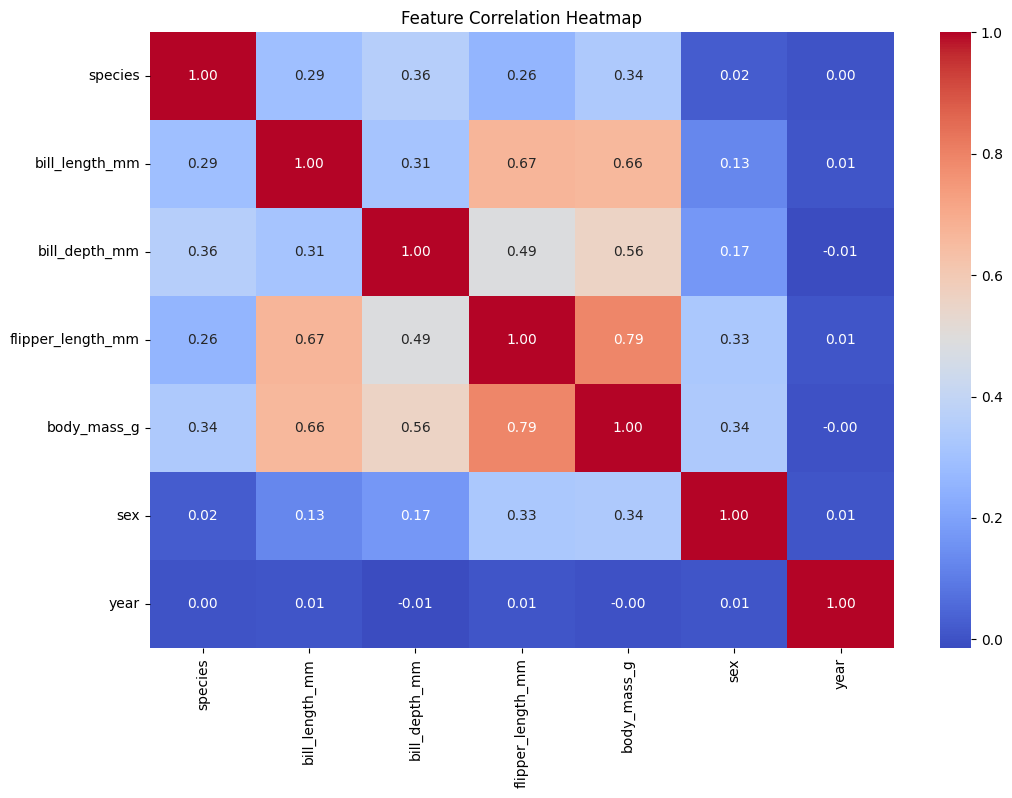

In [ ]:
plt.figure(figsize=(12, 8))
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()